# Práctica 2: Procesamiento de Lenguaje Natural
## Parte 1: Análisis de sentimiento
##### Grupo Lab: 06 <br> Ismail Azizi González y Daniel Alfaro Miranda 3ºA

### Apartado a)

Primero leemos todas las reviews del archivo y configuramos dos vectores, uno con los datos y otro con 0s o 1s indicando si son buenas o malas reviews. Despues separamos los datos en entrenamiento y test, siendo 75% entrenamiento y 25% test.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

with open('yelp_labelled.txt') as f:
    tmp = f.read().splitlines()

yelp_data = []
yelp_range = []
    
for i in range (0, len(tmp)):
    tmp_data, tmp_range = tmp[i].strip().split('\t')
    yelp_data.append(tmp_data)
    yelp_range.append(tmp_range)

from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(yelp_data, yelp_range, test_size=0.25, shuffle = True, random_state=333)

### CountVectorizer(binary = True) sin TF/IDF solo monogramas

Configuramos el CountVectorizer para monogramas con binary = True, con la lista de palabras vacías de sklearn y sin TF/IDF

In [155]:
vectorizer = CountVectorizer(stop_words='english', binary = True)

train_vector_data=vectorizer.fit_transform(train_data)
test_vector_data=vectorizer.transform(test_data)

Utilizamos el clasificador Naive Bayes Multinomial, que es el más adecuado ya estamos sin TFIDF y por lo tanto solo tratamos la apariciones de las palabras como un número entero

In [156]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_vector_data, train_target)

mnb_train_predictions = mnb_classifier.predict(train_vector_data)
mnb_test_predictions = mnb_classifier.predict(test_vector_data)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:"
      , np.mean(mnb_train_predictions == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:"
      , np.mean(mnb_test_predictions == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9586666666666667
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.756


In [157]:
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier(min_samples_leaf = 10)
tree_classifier.fit(train_vector_data, train_target)

tree_train_predictions = tree_classifier.predict(train_vector_data)
tree_test_predictions = tree_classifier.predict(test_vector_data)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.7226666666666667
Árbol, porcentaje de aciertos en test: 0.724


### CountVectorizer(binary = False) con TF/IDF solo monogramas

Configuramos el CountVectorizer para monogramas con binary = False, con la lista de palabras vacías de sklearn y usando TF/IDF

In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer2 = CountVectorizer(stop_words='english', binary = False)

train_vector_data_tfidf=vectorizer2.fit_transform(train_data)
test_vector_data_tfidf=vectorizer2.transform(test_data)

tfidfer = TfidfTransformer()

train_preprocessed = tfidfer.fit_transform(train_vector_data_tfidf)
test_preprocessed = tfidfer.transform(test_vector_data_tfidf)

Utilizamos el clasificador Naive Bayes Gaussiano, que es el más adecuado ya estamos usando TFIDF y por lo tanto hacemos la proporcion de las apariciones de los términos entre la frecuencia de las mismas en el documento, con lo cual podemos obtener valores discretos, los cuales se tratan mejor con el NBGaussiano

In [81]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

chunk_size=5
num_rows=len(train_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessed[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = train_target[i*chunk_size : (i+1)*chunk_size]
    gnb_classifier.partial_fit(train_chunk, target_chunk, classes=np.unique(train_target))

In [82]:
gnb_train_predictions=np.zeros_like(train_target)
gnb_test_predictions=np.zeros_like(test_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessed[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictions[i*chunk_size : (i+1)*chunk_size] = gnb_classifier.predict(train_chunk)
    
num_rows=len(test_target)
for i in range(0, (num_rows//chunk_size)):
    test_chunk = test_preprocessed[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictions[i*chunk_size : (i+1)*chunk_size] = gnb_classifier.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictions == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictions == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9506666666666667
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.696


In [98]:
tree_classifier2 = tree.DecisionTreeClassifier(min_samples_leaf = 10)
tree_classifier2.fit(train_preprocessed, train_target)

tree_train_predictions2 = tree_classifier2.predict(train_preprocessed)
tree_test_predictions2 = tree_classifier2.predict(test_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions2 == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions2 == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.7453333333333333
Árbol, porcentaje de aciertos en test: 0.724


### CountVectorizer(binary = True) sin TF/IDF, monogramas y bigramas

Configuramos el CountVectorizer para monogramas y bigramas con binary = True, con la lista de palabras vacías de sklearn y sin TF/IDF

In [84]:
vectorizer3 = CountVectorizer(stop_words='english', ngram_range=(1,2), binary = True)

train_vector_data_ngram_1_2=vectorizer3.fit_transform(train_data)
test_vector_data_ngram_1_2=vectorizer3.transform(test_data)

Usamos NBMultinomial igual que en el caso anterior sin TFIDF

In [85]:
mnb_classifier2 = MultinomialNB()

mnb_classifier2.fit(train_vector_data_ngram_1_2, train_target)

mnb_train_predictions2 = mnb_classifier2.predict(train_vector_data_ngram_1_2)
mnb_test_predictions2 = mnb_classifier2.predict(test_vector_data_ngram_1_2)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:"
      , np.mean(mnb_train_predictions2 == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:"
      , np.mean(mnb_test_predictions2 == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.984
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.768


In [99]:
tree_classifier3 = tree.DecisionTreeClassifier(min_samples_leaf = 10)
tree_classifier3.fit(train_vector_data_ngram_1_2, train_target)

tree_train_predictions3 = tree_classifier3.predict(train_vector_data_ngram_1_2)
tree_test_predictions3 = tree_classifier3.predict(test_vector_data_ngram_1_2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions3 == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions3 == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.7226666666666667
Árbol, porcentaje de aciertos en test: 0.724


### CountVectorizer(binary = False) con TF/IDF, monogramas y bigramas

Configuramos el CountVectorizer para monogramas y bigramas con binary = False, con la lista de palabras vacías de sklearn y usando TF/IDF

In [87]:
vectorizer4 = CountVectorizer(stop_words='english', ngram_range=(1,2), binary = False)

train_vector_data_ngram_1_2_tfidf=vectorizer4.fit_transform(train_data)
test_vector_data_ngram_1_2_tfidf=vectorizer4.transform(test_data)

tfidfer2 = TfidfTransformer()

train_preprocessed2 = tfidfer2.fit_transform(train_vector_data_ngram_1_2_tfidf)
test_preprocessed2 = tfidfer2.fit_transform(test_vector_data_ngram_1_2_tfidf)

Usamos NBGaussiano igual que en el caso anterior con TFIDF

In [88]:
gnb_classifier2 = GaussianNB()

chunk_size2=5
num_rows2=len(train_target)

for i in range(0, (num_rows2//chunk_size2)):
    train_chunk2 = train_preprocessed2[i*chunk_size2 : (i+1)*chunk_size2,:].toarray()
    target_chunk2 = train_target[i*chunk_size2 : (i+1)*chunk_size2]
    gnb_classifier2.partial_fit(train_chunk2, target_chunk2, classes=np.unique(train_target))

In [89]:
gnb_train_predictions2=np.zeros_like(train_target)
gnb_test_predictions2=np.zeros_like(test_target)

for i in range(0, (num_rows2//chunk_size2)):
    train_chunk2 = train_preprocessed2[i*chunk_size2 : (i+1)*chunk_size2,:].toarray()
    gnb_train_predictions2[i*chunk_size : (i+1)*chunk_size2] = gnb_classifier2.predict(train_chunk2)
    
num_rows2=len(test_target)
for i in range(0, (num_rows2//chunk_size2)):
    test_chunk2 = test_preprocessed2[i*chunk_size2 : (i+1)*chunk_size2,:].toarray()
    gnb_test_predictions2[i*chunk_size2 : (i+1)*chunk_size2] = gnb_classifier2.predict(test_chunk2)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictions2 == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictions2 == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9773333333333334
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.708


In [100]:
tree_classifier4 = tree.DecisionTreeClassifier(min_samples_leaf = 10)
tree_classifier4.fit(train_preprocessed2, train_target)

tree_train_predictions4 = tree_classifier4.predict(train_preprocessed2)
tree_test_predictions4 = tree_classifier4.predict(test_preprocessed2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions4 == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions4 == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.7453333333333333
Árbol, porcentaje de aciertos en test: 0.72


## Análisis de los clasificadores

#### Clasificadores Naive Bayes Multinomiales para datos sin TF/IDF:  
Tasa de aprendizaje muy alta.  
Tasa de aciertos más alta de los clasificadores usados.

#### Clasificadores Naive Bayes Gaussianos para datos con TF/IDF
Tasa de aprendizaje muy alta.  
Tasa de aciertos más baja de los clasificadores usados.

#### Árboles de decisión
Tasa de aprendizaje moderada.  
Tasa de aciertos intermedia entre Gaussianos y Multinomiales.

Podemos deducir de lo anterior que los mejores clasificadores serían los árboles de decisión o los Naive Bayes Multinomiales, ya que los primeros tienen la tasa de aprendizaje considerablemente baja (70-75%) y una tasa de aciertos comparable a los otros clasificadores (alrededor del 72%) y los NBMultinomiales aunque tengan una tasa de aprendizaje más alta (>95%) también son los que más tasa de aciertos tienen de todos (alrededor del 75%).  
Los árboles de decisión son buenos debido a que tal y como están diseñados, separan primero los nodos de tal forma que se discriminan las palabras que consigan mejor resultado en cada nodo (es decir, se reconocen muy bien las palabras que definen más claramente si la review es buena o mala).<br><br>
Los clasificadores Naive Bayes son sencillos y los que suelen usarse de referencia para otros clasificadores, aunque según en que contexto son buenos. En este caso los Multinomiales son mejores que los Gaussianos ya que añadir TF/IDF no aporta ninguna ventaja en esta situación, al reviews cortas y sin muchas palabras, no nos interesala proporcion de veces que aparecen las palabras, si no la presencia de estas sin más.<br><br>
Los bigramas a su vez no aportan nada concluyente, ya que nos interesa más fijarnos en palabras clave antes que en la probabilidad de una palabra condicionada por la aparicion de otra (por ejemplo, nos interesa más detectar palabras como "good", "bad", etc.. antes que intentar predecir que "good" va después de "very", ya que si tenemos en el conjunto de entrenamiento 7 apariciones de "good" después de "very", no ayuda nada a diferenciar que una review buena de una mala, ya que "bad" también puede ir detrás de "very").

### Variables con más poder discriminante
Arbol de decisión sobre el vectorizer sin TF/IDF y sin bigramas

In [101]:
def print_top25_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    
    top25 = np.argsort(clf.feature_importances_)[-25:]
    reversed_top = top25[::-1]
    print("Top 25 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))

In [102]:
print_top25_features_in_trees(vectorizer,tree_classifier)

Top 25 features in the tree

great / good / delicious / amazing / fantastic / nice / love / friendly / vegas / don / best / got / worst / food / restaurant / won / time / service / pretty / place / just / like / favorite / firehouse / finally


Predominan las palabras de sentimiento positivo, ya que normalmente una review con una de esas palabras casi siempre va a ser buena, ya que en una review mala es muy raro que aparezcan palabras positivas y las reviews buenas suelen ser más genericas que las malas (en las malas muchas veces la queja es algo concreto, no simplemente se dice que es malo).<br><br>
Hay ruido, ya que hay palabras como "food" o "service" que por si solas pueden ser usadas en ambos tipos de review ("good/bad service" o "good/bad food")

### Variables con más presencia
NBMultinomial sobre el vectorizer sin TF/IDF y sin bigramas

In [133]:
def print_top25_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top 25 features per class\n")
    for i, class_label in enumerate(class_labels):
        if i >= 2:
            break
        top25 = np.argsort(clf.feature_log_prob_[i])[-25:]
        reversed_top = top25[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')

In [134]:
print_top25_features_per_class_in_NB(vectorizer,mnb_classifier,test_target)

Top 25 features per class

0: food / place / service / like / good / don / time / ve / won / bad / worst / just / got / came / minutes / going / disappointed / wasn / eat / think / pretty / wait / did / ordered / ll 

1: good / great / food / place / service / delicious / time / amazing / really / nice / best / friendly / just / like / love / restaurant / awesome / vegas / fantastic / staff / experience / fresh / excellent / perfect / atmosphere 



Podemos ver que por lo general en las reviews buenas hay palabras como "good", "great", "delicious" que tienen bastante sentido para discriminar las reviews buenas y hay una cantidad bastante baja de ruido. Esto puede ser debido a, que como hemos remarcado antes, las reviews positivas suelen ser más genericas, ya que elogian algún aspecto mediante algún calificativo positivo.<br><br>
Las reviews malas por lo general tienen bastante más ruido, porque suelen quejarse de algo más concreto y no solo recurren al uso de calificativos negativos para ello (por ejemplo, aparece la palabra "eat" o "service" que no nos ayuda en nada a diferenciar ya que puede ser usada en ambos sentimientos). Si es verdad que algunas palabras como "bad" o "worst" aparecen, las cuales son bastante determinantes, pero por normal general hay mucho ruido.

### Apartado b)

#### Naive Bayes

In [143]:
from sklearn.metrics import classification_report, confusion_matrix

classifier=mnb_classifier
predictions = mnb_test_predictions

print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       124
           1       0.73      0.81      0.77       126

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



Tiene ligeramente mejor precision para las reviews negativas que para las positivas, pero recupera más reviews positivas que negativas.

#### Arbol

In [144]:
classifier=tree_classifier
predictions = tree_test_predictions

print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       124
           1       0.83      0.57      0.68       126

    accuracy                           0.72       250
   macro avg       0.75      0.73      0.72       250
weighted avg       0.75      0.72      0.72       250



Recupera la mayoría de opiniones negativas a costa de tener una precision considerablemente baja, y tiene una muy buena precision a la hora de recuperar opiniones positivas a costa de solo recuperar poco más de la mitad.

### Conclusiones
El clasificador de arbol acierta un 10% más en las opiniones positivas, pero a costa de recuperar un 24% menos de estas en comparacion con Naive Bayes Multinomial.<br>
En cuanto a las opiniones negativas, el clasificador de árbol recupera un 88% de ellas (18% más que el Naive Bayes) pero a costa de acertar solo un 67%, mientras que Naive Bayes acierta un 11% más de las veces.<br><br>
De estos datos podemos deducir que Naive Bayes es más consistente en su labor de clasificar que el clasificador de arbol.

### Arbol de decision representado

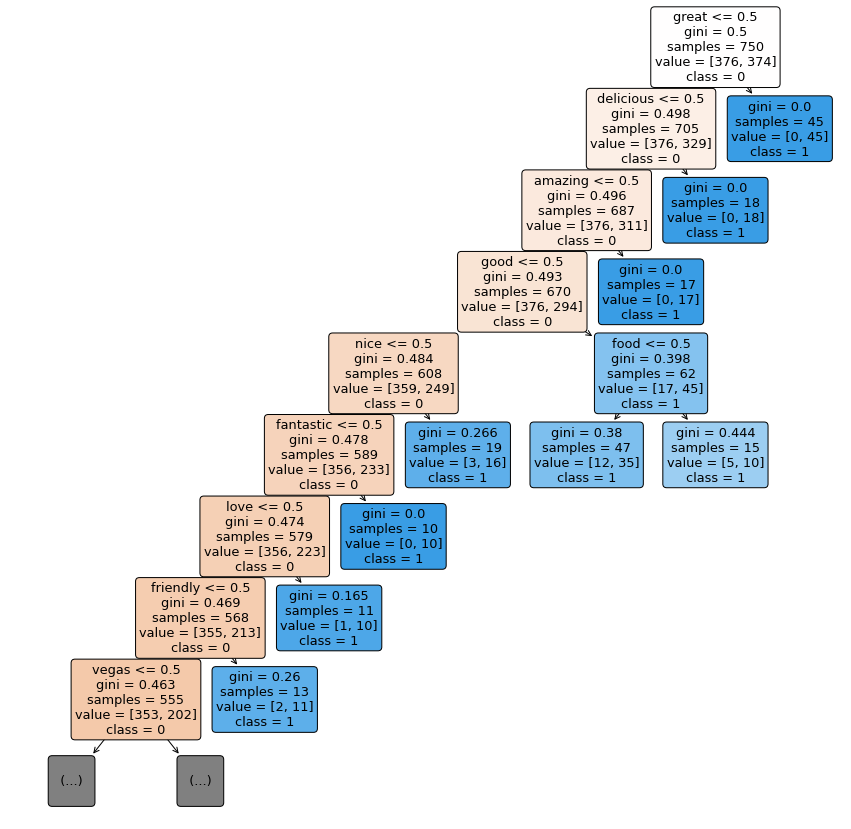

In [152]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(tree_classifier, filled=True, rounded=True, max_depth = 8,
    feature_names = vectorizer.get_feature_names(), class_names = test_target)
plt.show()

El árbol está totalmente inclinado hacia la izquierda, ya que a la derecha separa muy rápido las opiniones positivas de las negativas. Se puede observar la precision del 83% en las opiniones positivas en las ramas derechas del árbol, ya que clasifica muy rapido las opiniones positivas (a costa de llevarse consigo algunas opiniones negativas y clasificarlas como positivas). Por lo general, en las primeras 8 alturas del árbol no se nota tanto la presencia de nodos impuros en la rama derecha, sin embargo la rama izquierda sí tiene muchos nodos impuros, ya que tarda en diferenciar las opiniones negativas.

### Ejemplo de falsos positivos y falsos negativos

#### Falsos positivos NB

In [173]:
j = 0
for i in range(0, 250):
    if test_target[i] == '0' and mnb_test_predictions[i] == '1':
        print(test_data[i])
        print("\n")
        j = j + 1
        if j == 2:
            break

He was extremely rude and really, there are so many other restaurants I would love to dine at during a weekend in Vegas.


I will never go back to this place and will never ever recommended this place to anyone!




La primera review ha sido calificada como positiva dado que tiene la palabra "Vegas" (sabemos que es esta palabra porque es una de las más discriminantes para determinar una review buena, aunque solo es ruido), la cual está presente en 22 reviews y de esas 22, 15 son positivas. El clasificador ha utilizado una palabra que no tiene nada que ver con que sea una review buena o mala para clasificar la review. En este caso, la palabra solo es ruido pero aun así ha conseguido confundir al clasificador.<br><br>
Con la segunda review ocurre lo mismo, la palabra "place" es una de las más discriminantes para determinar una review buena, pero solamente es ruido y no debería definir nada, ya que puede ser usada en ambos contextos. Hay 112 apariciones de "place" y la mayoría son en reviews positivas, por eso el clasificador piensa que sirve para determinar el sentimiento de la review

#### Falsos negativos NB

In [179]:
j = 0
for i in range(0, 250):
    if test_target[i] == '1' and mnb_test_predictions[i] == '0':
        if j == 11 or j == 13:
            print(test_data[i])
            print("\n")
        j = j + 1
        if j == 15:
            break

Restaurant is always full but never a wait.


We made the drive all the way from North Scottsdale... and I was not one bit disappointed!




En estos dos casos hemos cogido dos frases con las palabras "wait" y "dissapointed" que en principio debería denotar que la review es mala (no es bueno esperar y disappointed significa decepcionado) pero dichas palabras quieren referirse a aspectos positivos, ya que antes de dichas palabras hay una negación. Por ese motivo el clasificador se ha equivocado, porque no ha conseguido entender el contexto de la frase y solo se ha fijado en la palabra en concreto.

#### Falsos positivos arbol

In [181]:
j = 0
for i in range(0, 250):
    if test_target[i] == '0' and tree_test_predictions[i] == '1':
        print(test_data[i])
        print("\n")
        j = j + 1
        if j == 2:
            break

He was extremely rude and really, there are so many other restaurants I would love to dine at during a weekend in Vegas.


So don't go there if you are looking for good food...




En este caso hemos tenido el mismo problema que antes con la palabra "Vegas", y en la segunda review hemos tenido un problema con la palabra "good", que se utiliza para reviews buenas normalmente, pero otra vez el clasificador no ha entendido el contexto de la frase que niega la palabra "good"

#### Falsos negativos arbol

In [193]:
j = 0
for i in range(0, 250):
    if test_target[i] == '1' and tree_test_predictions[i] == '0':
        if j == 25 or j == 38:
            print(test_data[i])
            print("\n")
        j = j + 1
        if j == 39:
            break

OMG, the food was delicioso!


I hope this place sticks around.




En este caso hemos cogido dos reviews donde aparecen las palabras "food" y "place" presentes tanto en reviews buenas como malas, con lo cual no debería valer para diferenciar reviews buenas de malas, pero al tener tantas apariciones, se utiliza en el arbol de decision para partir un nodo, y si luego el nodo no se vuelve a dividir o se divide en base a otra palabra que no figure en una de las frases que contenia las palabras anteriores, puede quedarse la frase perdida en un nodo impuro.

### Mejorar el clasificador
Para mejorar el clasificador podriamos hacer que se fijase en el contexto de la frase y no solo en palabras sueltas. Si lo tomamos desde el punto de vista más sintáctico, podríamos analizar no solo los adjetivos que describen algo bueno o algo malo, si no también los cuantificadores o modificadores que pueden cambiar el sentido del adjetivo.